In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV #log reg for loss calculation
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split # split into test and validation
from sklearn.preprocessing import StandardScaler #standardization
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA, IncrementalPCA
from numpy.linalg import eigh
import seaborn as sns

In [2]:
# Problem 1
cancer = load_breast_cancer()
#print(type(cancer))
#print(cancer.data)
#print(cancer.target)
model = GaussianNB()
xtr, xte, ytr, yte = train_test_split(cancer.data,cancer.target,test_size = 0.2,random_state = 0,shuffle = True)
model.fit(xtr,ytr)
model.predict(xte)

guess = model.predict(xte)
correct = yte

print(classification_report(correct,guess))
print(confusion_matrix(correct,guess))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

[[43  4]
 [ 4 63]]


In [3]:
#Problem 2
#Standardization
train = cancer.data
test = cancer.target

xtrain, xtest, ytrain, ytest = train_test_split(train,test,test_size = 0.2,random_state = 0,shuffle = True)
std = StandardScaler()

scancerx = std.fit_transform(xtrain)
scancery = std.transform(xtest)



In [4]:
#problem 2
#logisitic Regression
def Log_Reg(xtr,ytr,xte,yte,k,title,weight_penalty):
    
    if(k>0):
        model =LogisticRegressionCV(penalty = weight_penalty,random_state = 0,solver = 'liblinear',cv = k,max_iter=1000) #set model = to Logistic regression
    elif(k==0):
        model = LogisticRegression(penalty = weight_penalty,random_state = 0,max_iter=1000) #set model = to Logistic regression
    model.fit(xtr,ytr) # train model on xtr and ytr
    y_pred = model.predict(xte) # command for including validation into training
    
    print(title)
    print("Accuracy: ",accuracy_score(yte,y_pred))
    print("Precision: ",precision_score(yte,y_pred))
    print("Recall: ",recall_score(yte,y_pred))
    print('\n')
    #CONFUSION MATRIX PORTION
    confusion = confusion_matrix(yte,y_pred)
    class_names=["true","false"] # name  of classes 
    fig, ax = plt.subplots() 
    tick_marks = np.arange(len(class_names)) 
    plt.xticks(tick_marks, class_names) 
    plt.yticks(tick_marks, class_names)
    
    # create heatmap 
    sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g') 
    ax.xaxis.set_label_position("top") 
    plt.tight_layout()
    title = "Confusion Matrix: " + title
    plt.title(title, y=1.1) 
    plt.ylabel('Actual label') 
    plt.xlabel('Predicted label') 
    
    return y_pred


1
Cancer Logistic Regression PCA
Accuracy:  0.9035087719298246
Precision:  0.9242424242424242
Recall:  0.9104477611940298


2
Cancer Logistic Regression PCA
Accuracy:  0.9385964912280702
Precision:  0.9838709677419355
Recall:  0.9104477611940298


3
Cancer Logistic Regression PCA
Accuracy:  0.9210526315789473
Precision:  0.953125
Recall:  0.9104477611940298


4
Cancer Logistic Regression PCA
Accuracy:  0.9210526315789473
Precision:  0.953125
Recall:  0.9104477611940298


5
Cancer Logistic Regression PCA
Accuracy:  0.956140350877193
Precision:  0.9558823529411765
Recall:  0.9701492537313433


6
Cancer Logistic Regression PCA
Accuracy:  0.956140350877193
Precision:  0.9558823529411765
Recall:  0.9701492537313433


7
Cancer Logistic Regression PCA
Accuracy:  0.956140350877193
Precision:  0.9558823529411765
Recall:  0.9701492537313433


8
Cancer Logistic Regression PCA
Accuracy:  0.9473684210526315
Precision:  0.9552238805970149
Recall:  0.9552238805970149


9
Cancer Logistic Regression PC

C:\Users\matth\AppData\Local\Temp\ipykernel_4976\309420373.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Cancer Logistic Regression PCA
Accuracy:  0.956140350877193
Precision:  0.9558823529411765
Recall:  0.9701492537313433


23
Cancer Logistic Regression PCA
Accuracy:  0.956140350877193
Precision:  0.9696969696969697
Recall:  0.9552238805970149


24
Cancer Logistic Regression PCA
Accuracy:  0.956140350877193
Precision:  0.9696969696969697
Recall:  0.9552238805970149


25
Cancer Logistic Regression PCA
Accuracy:  0.9473684210526315
Precision:  0.9692307692307692
Recall:  0.9402985074626866


26
Cancer Logistic Regression PCA
Accuracy:  0.956140350877193
Precision:  0.9696969696969697
Recall:  0.9552238805970149


27
Cancer Logistic Regression PCA
Accuracy:  0.956140350877193
Precision:  0.9696969696969697
Recall:  0.9552238805970149


28
Cancer Logistic Regression PCA
Accuracy:  0.956140350877193
Precision:  0.9696969696969697
Recall:  0.9552238805970149


29
Cancer Logistic Regression PCA
Accuracy:  0.956140350877193
Precision:  0.9696969696969697
Recall:  0.9552238805970149


30
Cancer 

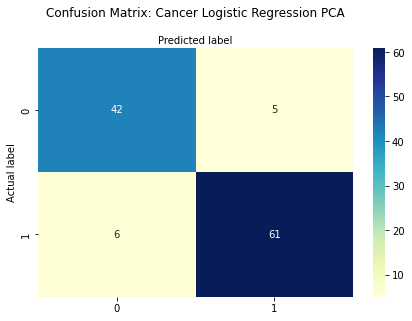

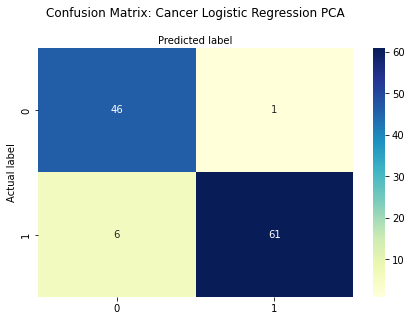

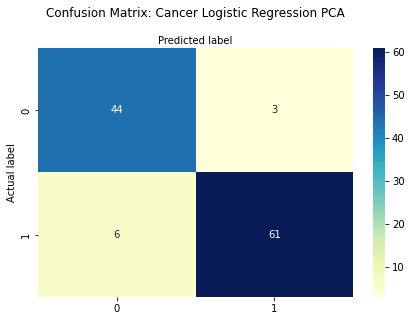

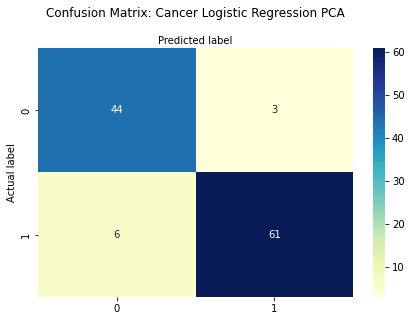

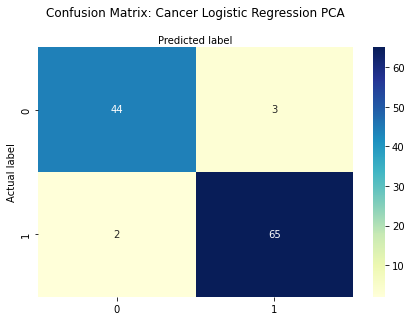

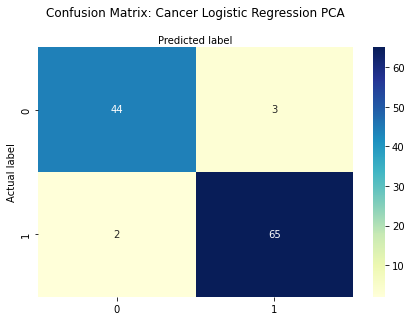

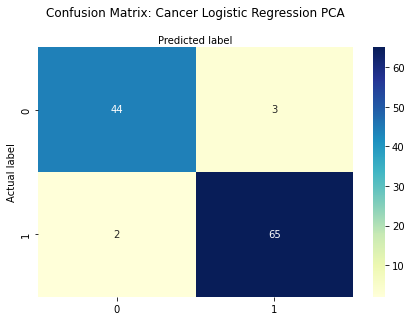

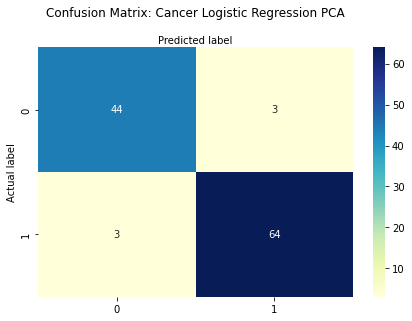

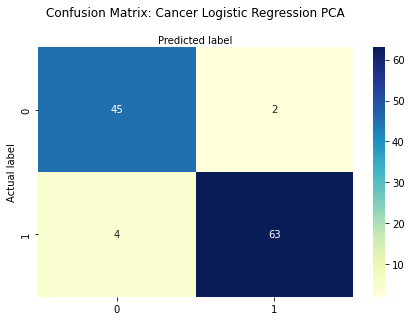

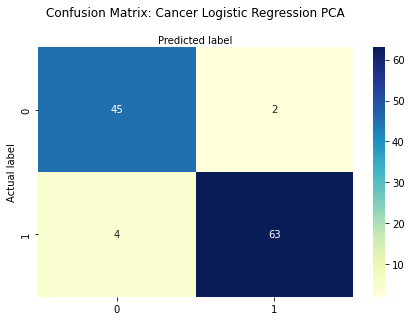

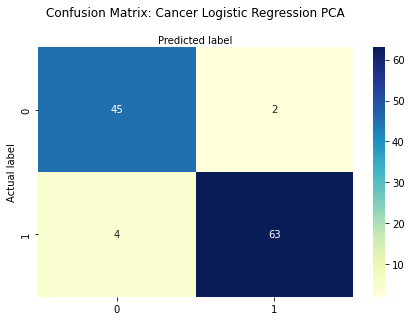

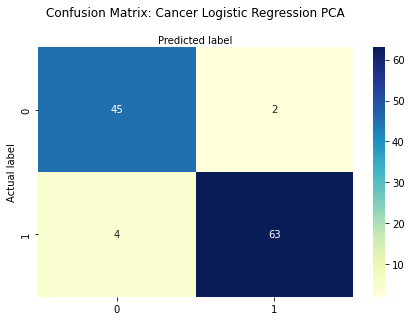

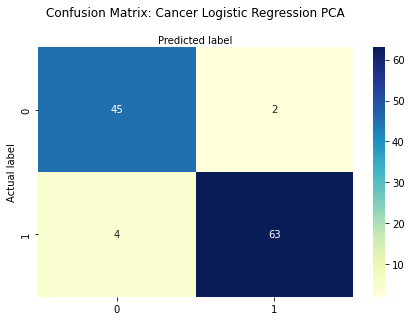

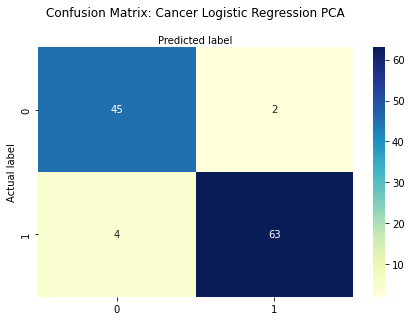

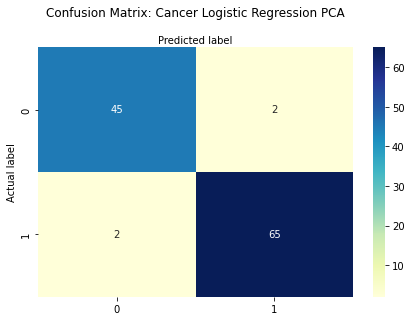

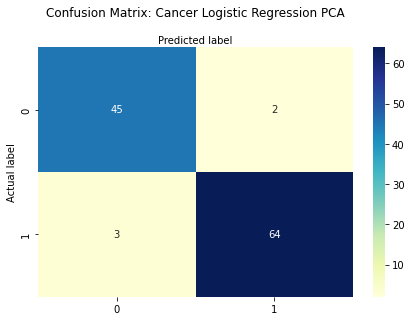

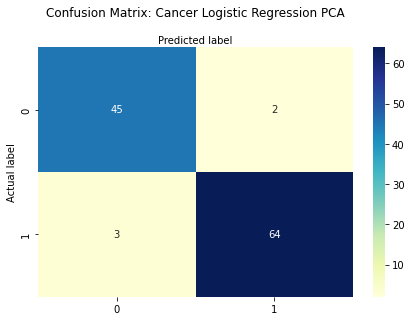

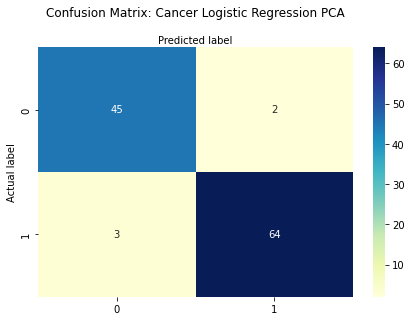

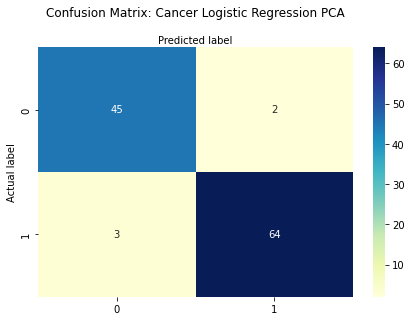

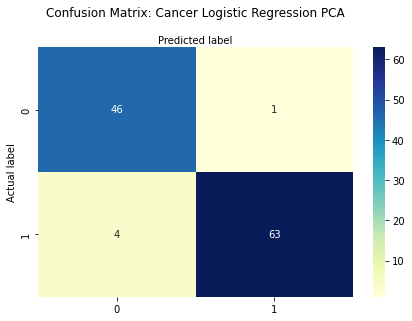

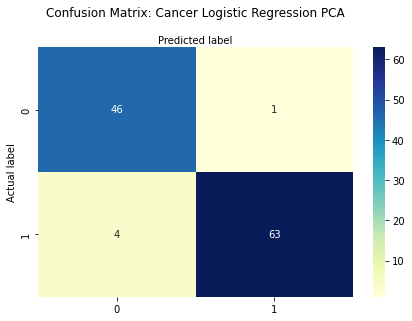

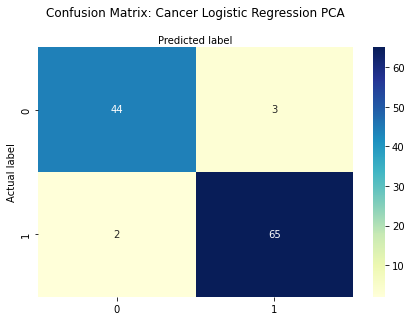

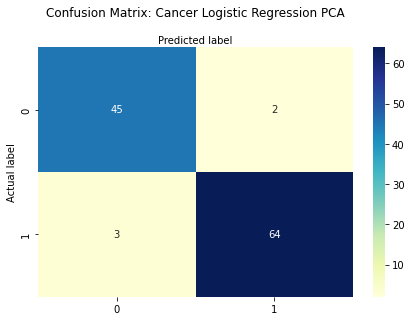

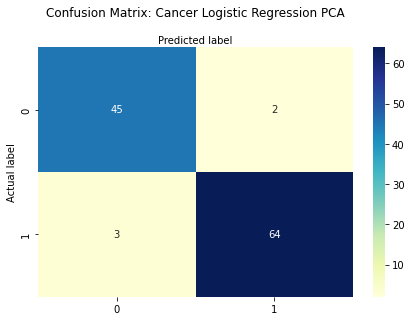

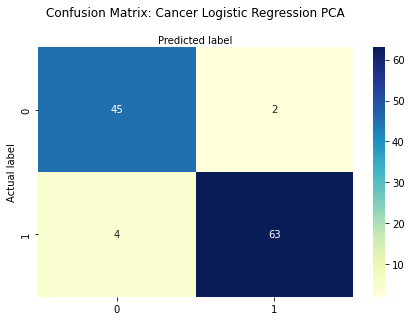

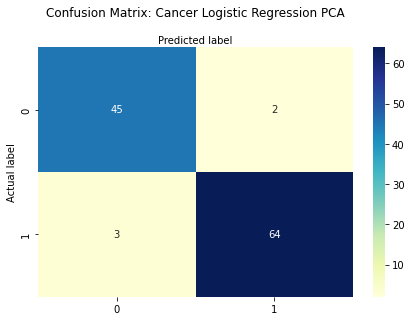

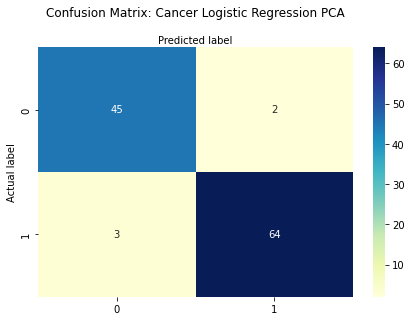

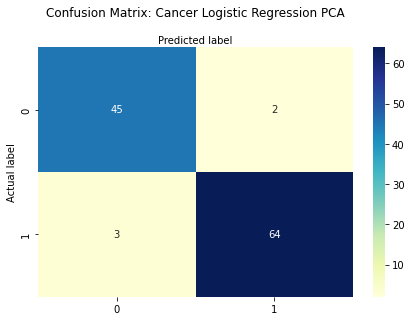

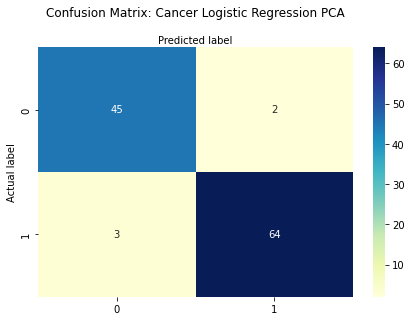

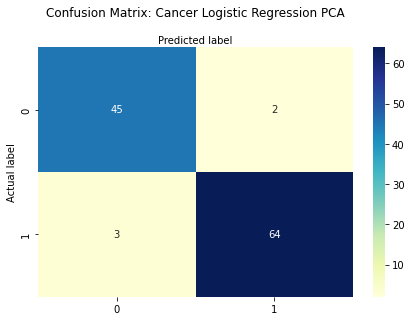

In [5]:
#Problem 2
#PCA


for i in range(30):
    print(i+1)
    pca = IncrementalPCA(n_components = (i+1))
    xtrain_pca = pca.fit_transform(scancerx)
    xtest_pca = pca.transform(scancery)
    result = Log_Reg(xtrain_pca,ytrain,xtest_pca,ytest,0,"Cancer Logistic Regression PCA",'none')
#optimal K = 15

Cancer Logistic Regression PCA
Accuracy:  0.9649122807017544
Precision:  0.9701492537313433
Recall:  0.9701492537313433




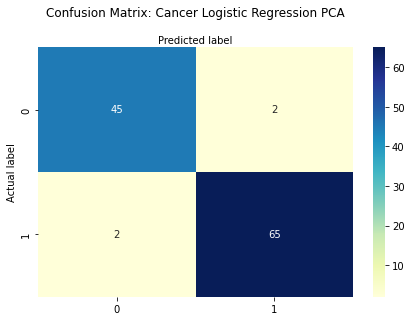

In [6]:
#problem 2
pca = IncrementalPCA(n_components = 15)
xtrain_pca = pca.fit_transform(scancerx)
xtest_pca = pca.transform(scancery)
result = Log_Reg(xtrain_pca,ytrain,xtest_pca,ytest,0,"Cancer Logistic Regression PCA",'none')

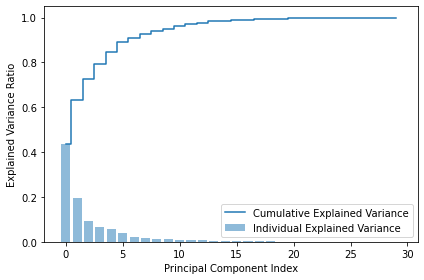

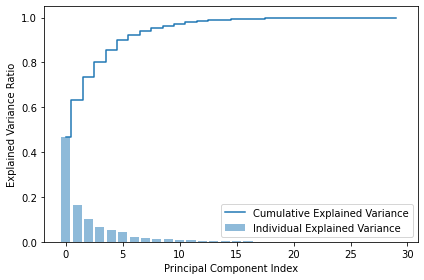

In [7]:
def data_PCA(xtrain,xtest,k): #standardized before hand
    
    cov_matrix_train = np.cov(xtrain, rowvar=False)
    cov_matrix_test = np.cov(xtest, rowvar=False)
    
    evalues_train, evectors_train = eigh(cov_matrix_train)
    
    evalues_test, evectors_test = eigh(cov_matrix_test)
    
    total_egnvalues_train = sum(evalues_train)
    total_egnvalues_test = sum(evalues_test)
    
    var_exp_train = [(i/total_egnvalues_train) for i in sorted(evalues_train, reverse =True)] #sorted takes an object and sorts based on specification, in this case its all elements in reverse
    
    #explained variance vs cumulative explained variance
    exp_cumulsum_tr = np.cumsum(var_exp_train)
    plt.bar(range(0,len(var_exp_train)),var_exp_train,alpha = 0.5,align='center',label = 'Individual Explained Variance')
    plt.step(range(0,len(exp_cumulsum_tr)),exp_cumulsum_tr,where='mid',label='Cumulative Explained Variance')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Component Index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    var_exp_test = [(i/total_egnvalues_test) for i in sorted(evalues_test, reverse =True)]
    
    exp_cumulsum_te = np.cumsum(var_exp_test)
    plt.bar(range(0,len(var_exp_test)),var_exp_test,alpha = 0.5,align='center',label = 'Individual Explained Variance')
    plt.step(range(0,len(exp_cumulsum_te)),exp_cumulsum_te,where='mid',label='Cumulative Explained Variance')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Component Index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

data_PCA(scancerx,scancery,19)

In [8]:
#problem 3
#xtrain_pca,ytrain,xtest_pca,ytest
# NB is already biased towards specific values, PCA makes it even more biased towards those values, decreasing precision, recall, average overall
model = GaussianNB()

model.fit(xtrain_pca,ytrain)

guess = model.predict(xtest_pca)
correct = ytest

print(classification_report(correct,guess))
print(confusion_matrix(correct,guess))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        47
           1       0.93      0.94      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

[[42  5]
 [ 4 63]]
